In [1]:
library(igraph)
library(fingraph)
library(fitHeavyTail)
library(xts)
set.seed(123)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: spectralGraphTopology


Attaching package: ‘spectralGraphTopology’


The following object is masked from ‘package:stats’:

    D


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
crypto_prices <- readRDS("crypto-prices.rds")

In [3]:
head(crypto_prices)

                         BTC      ETH     USDT      BNB     USDC      XRP
2022-01-01 08:00:00 47686.81 3769.697 1.000500 527.3527 1.000085 0.849472
2022-01-02 08:00:00 47345.22 3829.565 1.000460 531.3967 0.999765 0.859118
2022-01-03 08:00:00 46458.12 3761.380 1.000165 512.1360 0.999708 0.832885
2022-01-04 08:00:00 45897.57 3794.057 1.000208 507.5061 1.000585 0.824673
2022-01-05 08:00:00 43569.00 3550.387 1.000122 475.0569 0.999757 0.774358
2022-01-06 08:00:00 43160.93 3418.408 1.000195 473.2756 0.999560 0.781346
                         ADA      HEX     DOGE      SOL    MATIC      DOT
2022-01-01 08:00:00 1.376975 0.248434 0.173035 178.5179 2.574791 28.58358
2022-01-02 08:00:00 1.377584 0.217475 0.174403 176.3828 2.549190 29.73117
2022-01-03 08:00:00 1.321637 0.244516 0.170088 170.2977 2.432652 30.10510
2022-01-04 08:00:00 1.311658 0.246714 0.168803 167.9389 2.367248 28.77773
2022-01-05 08:00:00 1.236002 0.203662 0.159420 155.0997 2.195475 26.79614
2022-01-06 08:00:00 1.279782 0.214324 

In [4]:
colnames(crypto_prices)

[1] "BTC"      "ETH"      "USDT"     "BNB"      "USDC"     "XRP"     
 [7] "ADA"      "HEX"      "DOGE"     "SOL"      "MATIC"    "DOT"     
[13] "TRX"      "LTC"      "BUSD"     "SHIB"     "AVAX"     "DAI"     
[19] "LEO"      "LINK"     "ATOM"     "UNI7083"  "XMR"      "OKB"     
[25] "ETC"      "TON11419" "XLM"      "BCH"      "ICP"      "CNX"     
[31] "TUSD"     "FIL"      "HBAR"     "CRO"      "LDO"      "NEAR"    
[37] "VET"      "QNT"      "ALGO"     "USDP"     "FTM"      "GRT6719"

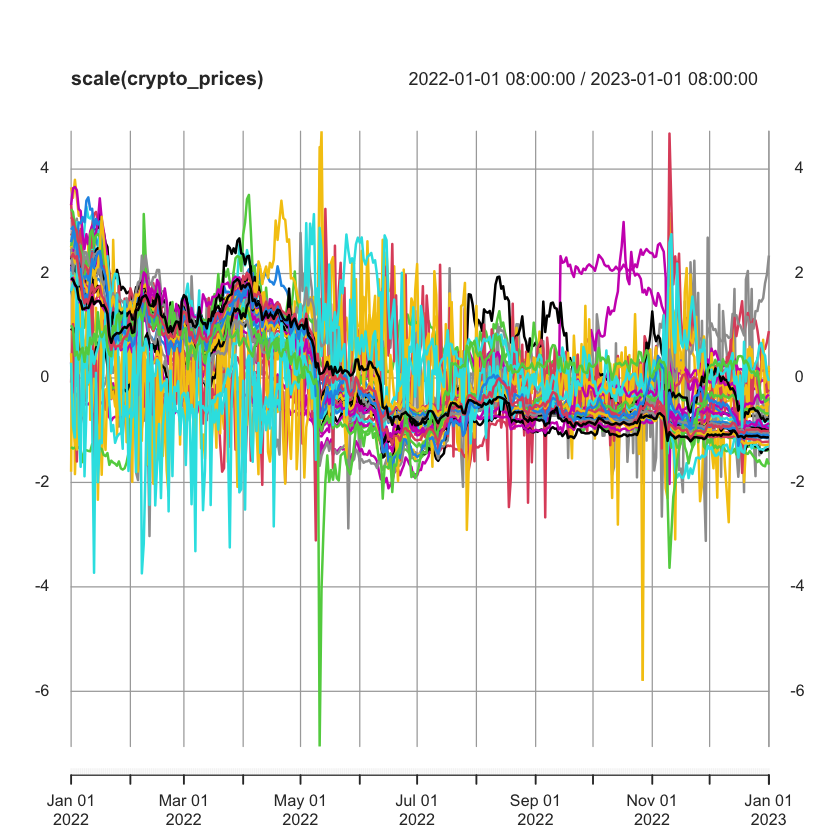

In [5]:
plot(scale(crypto_prices))

In [6]:
X <- diff(log(crypto_prices), na.pad = FALSE)
p <- ncol(X)

In [7]:
graph_mrf <- learn_kcomp_heavytail_graph(scale(X),
                                         k = 8,
                                         heavy_type = "student",
                                         nu = fit_mvt(scale(X))$nu,
                                         verbose = FALSE)

In [8]:
graph_mrf$convergence

[1] TRUE

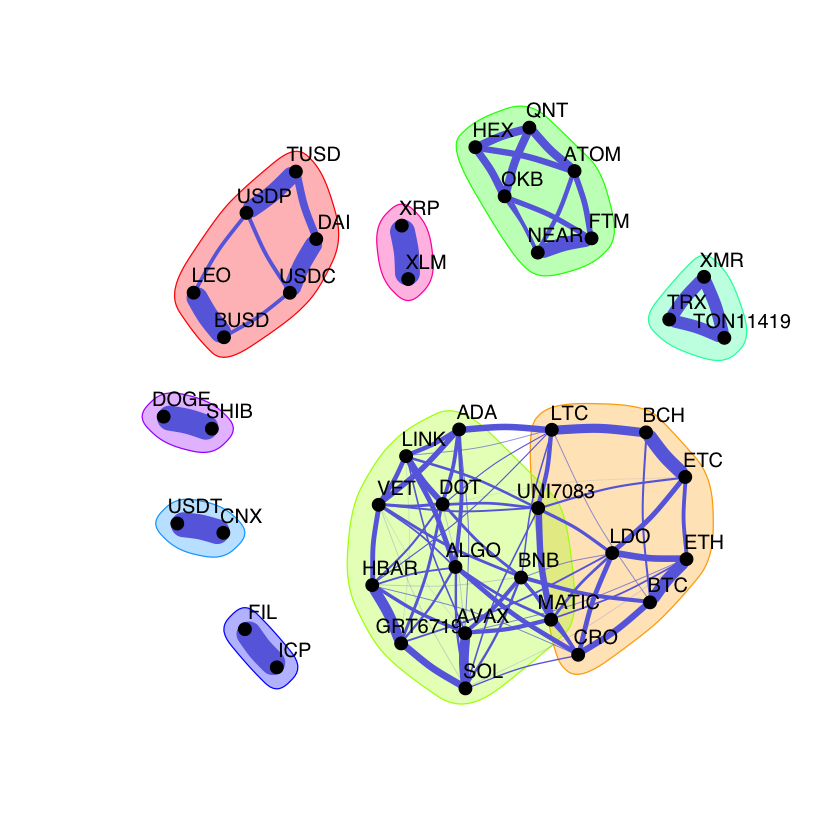

In [9]:
net <- graph_from_adjacency_matrix(graph_mrf$adjacency,
                                   mode = "undirected",
                                   weighted = TRUE)
cfg <- cluster_fast_greedy(as.undirected(net))
la_kcomp <- layout_nicely(net)
V(net)$label.cex = 1
plot(cfg, net, vertex.label = colnames(crypto_prices),
     layout = la_kcomp,
     vertex.size = 4.5,
     col = "black", 
     edge.color = c("#686de0"),
     vertex.label.family = "Helvetica",
     vertex.label.color = "black",
     vertex.label.dist = 1.25,
     vertex.shape = "circle",
     edge.width = 20*E(net)$weight,
     edge.curved = 0.1)

In [10]:
modularity(cfg)

[1] 0.746919